In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [2]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data
faces.shape

(400, 4096)

In [3]:
dataset.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(dataset['DESCR'])


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [5]:
dataset.target


array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [6]:
df=pd.DataFrame(dataset['data'])
df.head()


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.528926,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.400826,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.438017,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.198347,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.061983,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405


### Der Datensatz
enthält 400 Samples mit 40 Klassen, 4096 Dimensionen ($64^2$ Pixelwerte)

Überlegung: Datenkompression durch Dimensionsreduktion, nach dem wir die PCA durchgefürt haben

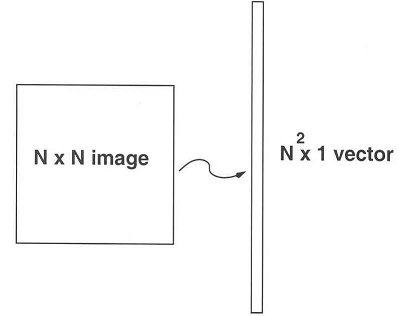

Normailisere Gesichtsvektoren:
- Mit $ \phi_i = F_i - \mu $ 

Dabei ist $ F_i $ der $i$-te Gesichtsvektor und $\mu$ das Durchschnittsgesicht

Kovarianzmatrix $ \Sigma $ berchnen mit:
- $ \Sigma = A^TA $ wobei $ A = [\phi_1, \phi_2,\dots, \phi_m ] $ der Form $ \mathbb{R}^{M \times N^{2}} $
- $M$ ist die Anzahl unser Datenpunkte
- $ \Sigma $ hat die Form  $ \mathbb{R}^{N^{2} \times N^{2}} $


Umstellen der Formel für unsere Kovarianzmatrix  $ \Sigma = A^TA $ mit der Form $ \mathbb{R}^{M \times M} $

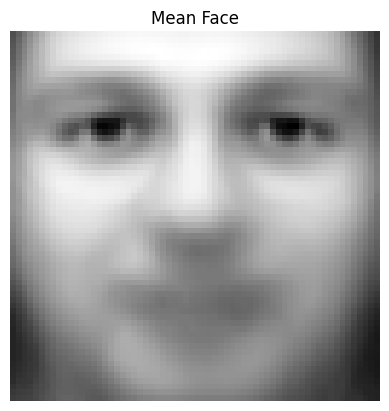

In [7]:
# Mean Face berechnen
mean_face = np.mean(faces, axis=0)

# Mean Face anzeigen
plt.imshow(mean_face.reshape(64,64), cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.show()

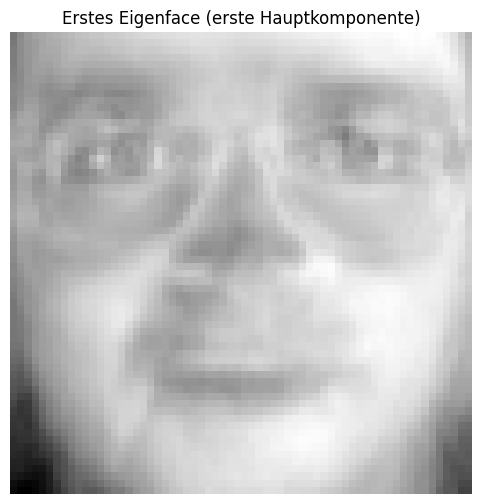

In [8]:
pca_1d = PCA(n_components=1)
faces_pca_1d = pca_1d.fit_transform(df)
first_component = pca_1d.components_[0]
eigenface = first_component.reshape(64, 64)

plt.figure(figsize=(6, 6))
plt.imshow(eigenface, cmap='gray')
plt.title('Erstes Eigenface (erste Hauptkomponente)')
plt.axis('off')
plt.show()

## Visualisierung von Eigenfaces

Eigenfaces stellen die Hauptkomponenten dar, die aus einem Datensatz von Gesichtsbildern mittels Principal Component Analysis (PCA) extrahiert wurden. Jedes Eigenface erfasst die wichtigsten Merkmale oder Muster, die im gesamten Datensatz vorhanden sind, und kann als die Bausteine aller Gesichter im Datensatz betrachtet werden.

### Was sind Eigenfaces?
Eigenfaces sind im Wesentlichen die "Richtungen" im hochdimensionalen Raum (wobei jeder Pixel im Bild eine Dimension darstellt), die die maximale Varianz in den Daten erfassen. Wenn wir die ursprünglichen Bilder auf diese Eigenfaces projizieren, können wir die Gesichter mit einer viel kleineren Anzahl von Dimensionen rekonstruieren, verglichen mit den ursprünglichen Pixelwerten.

### Visualisierung:
Jedes Eigenface wird als Graustufenbild dargestellt, wobei hellere und dunklere Bereiche Merkmale repräsentieren, die zwischen den verschiedenen Gesichtern variieren. Einige Eigenfaces erfassen beispielsweise Aspekte wie die allgemeine Gesichtsform, das Vorhandensein einer Brille oder Gesichtsausdrücke.

Diese Eigenfaces sind in Anwendungen wie der Gesichtserkennung von entscheidender Bedeutung, da jedes Gesicht im Datensatz als eine Kombination dieser Eigenfaces dargestellt werden kann. Dadurch wird die Dimensionalität erheblich reduziert, während die wesentlichen Merkmale erhalten bleiben.


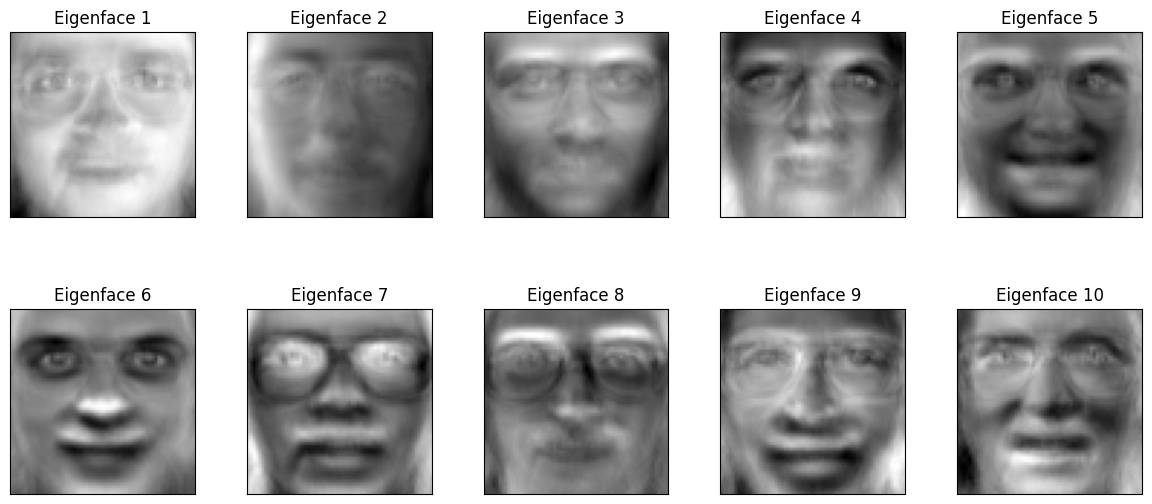

In [9]:
faces_data = fetch_olivetti_faces()
X = faces_data.data
image_shape = faces_data.images[0].shape

n_components = 10  
pca = PCA(n_components=n_components, whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, image_shape[0], image_shape[1]))

fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.5, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i + 1}")

plt.show()


In [10]:
# Get the principal components
components = pca_1d.components_

# Create a DataFrame to see which features contribute to which principal component
# The DataFrame index corresponds to the principal components
# The columns correspond to the features
df_components = pd.DataFrame(components)

# Display the contribution of each feature to the first two components
print("Contribution of features to the first principal component:")
print(df_components.iloc[0].sort_values(ascending=False))


Contribution of features to the first principal component:
54      0.024313
57      0.024203
55      0.024161
119     0.024006
58      0.023981
          ...   
3971   -0.011903
4035   -0.012151
3970   -0.012207
4033   -0.012904
4034   -0.013082
Name: 0, Length: 4096, dtype: float32


Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: 123


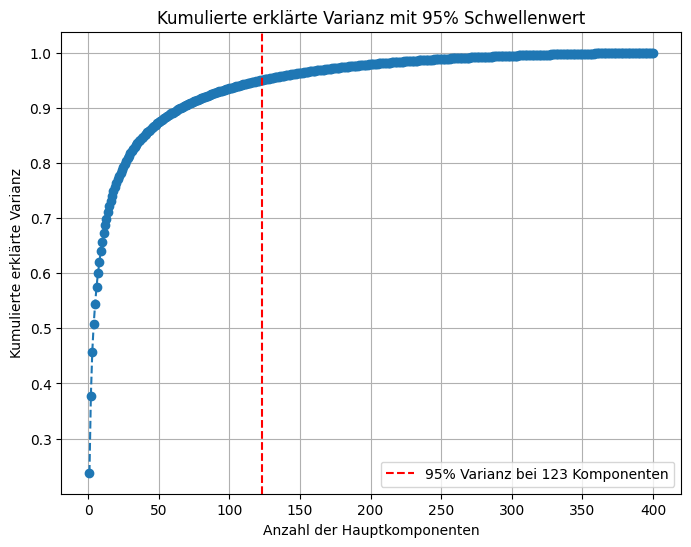

In [11]:
# PCA ohne Angabe der Anzahl der Komponenten
pca = PCA()
pca.fit(faces)
# Erklärte Varianz und kumulierte erklärte Varianz berechnen
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Anzahl der Komponenten für 95% der Varianz
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Die Anzahl der Hauptkomponenten, die 95% der Varianz erklären, ist: {num_components}')

# Plot mit dem identifizierten Punkt für 95% der Varianz
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'95% Varianz bei {num_components} Komponenten')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz mit 95% Schwellenwert')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
pca = PCA(n_components=123, whiten=True)
faces_pca = pca.fit_transform(faces)
compressed_size = (faces_pca.nbytes + pca.components_.nbytes) / (1024 ** 2)  # Größe in Megabyte


In [13]:
original_size = faces.nbytes / (1024 ** 2)  # Größe in Megabyte
print(f'{original_size} MB')


6.25 MB


In [14]:
print(f'{compressed_size} MB')


2.10955810546875 MB


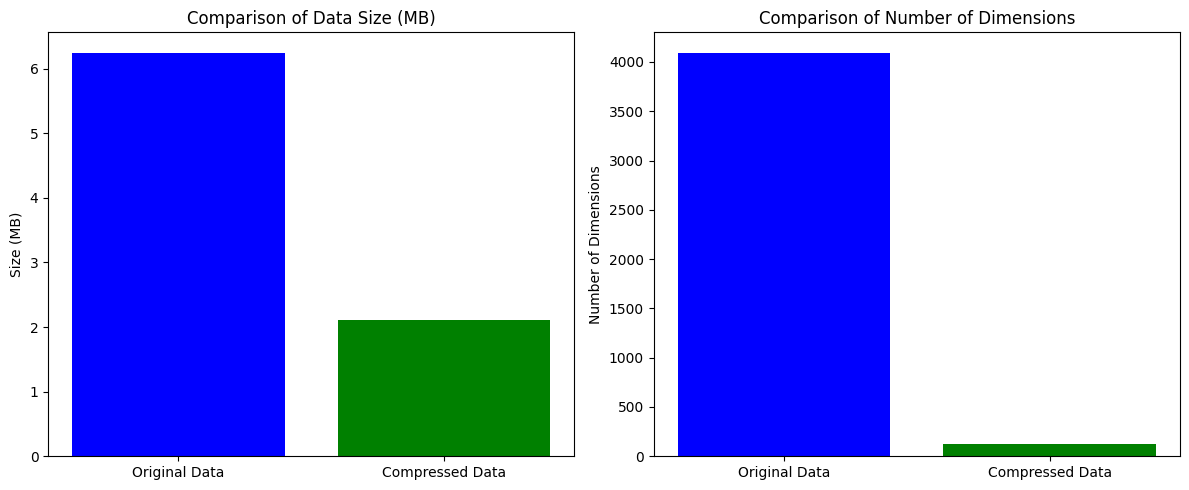

In [15]:
data_sizes = [6.25, 2.11]  # In MB
dimensions = [4096, 123]   # Number of dimensions

labels = ['Original Data', 'Compressed Data']

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(labels, data_sizes, color=['blue', 'green'])
axs[0].set_title('Comparison of Data Size (MB)')
axs[0].set_ylabel('Size (MB)')

axs[1].bar(labels, dimensions, color=['blue', 'green'])
axs[1].set_title('Comparison of Number of Dimensions')
axs[1].set_ylabel('Number of Dimensions')

plt.tight_layout()
plt.show()

**Unsere Daten liegen nun komprimiert vor:**
- Zuvor 6.25 MB und 4096 Dimensionen und nun 2.11 MB und 123 Dimensionen

Können wir ein Bild wieder rekonstruieren?

## Mathematische Erklärung der Inverse-Transformation

Die Inverse-Transformation in der Hauptkomponentenanalyse (PCA) ist der Prozess, durch den die reduzierten Daten wieder in den ursprünglichen Merkmalsraum zurücktransformiert werden. Dies ermöglicht es uns, eine Annäherung des ursprünglichen Datensatzes zu rekonstruieren, wobei nur die Hauptkomponenten verwendet werden.

### 1. **PCA-Transformation**

Die PCA-Transformation kann mathematisch dargestellt werden als:

$$
X_{\text{PCA}} = X \cdot W
$$

wobei:

- $ X $ die ursprünglichen Daten (z.B. das Bild) sind.
- $ W $ die Matrix der Eigenvektoren (die Hauptkomponenten) ist.
- $ X_{\text{PCA}}$) die projizierten Daten im Hauptkomponentenraum sind.

### 2. **Inverse-Transformation**

Um die ursprünglichen Daten $ X $ aus den projizierten Daten $ X_{\text{PCA}} $ wiederherzustellen, verwenden wir die Inverse-Transformation:

$$
X_{\text{rekonstruiert}} = X_{\text{PCA}} \cdot W^T + \mu
$$

wobei:

- $ W^T $ die Transponierte der Matrix der Eigenvektoren ist.
- $ X_{\text{rekonstruiert}} $ die rekonstruierten Daten im ursprünglichen Merkmalsraum sind.

### 3. **Interpretation**

Die rekonstruierten Daten $ X_{\text{rekonstruiert}} $ sind eine Annäherung an die ursprünglichen Daten $ X $. Da bei der PCA nur die wichtigsten Hauptkomponenten (d.h. diejenigen mit den höchsten Eigenwerten) beibehalten werden, verlieren wir einige Informationen. Dies führt dazu, dass das rekonstruierte Bild typischerweise eine glattere und weniger detaillierte Version des Originalbildes ist.

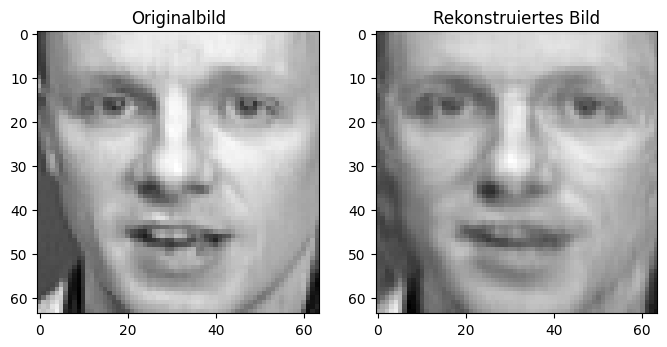

Original shape: (4096,)
Compressed shape: (4096,)


In [16]:
# Ein Bild komprimieren und rekonstruieren
face_idx = 0  # Index des zu komprimierenden Bildes
original_face = faces[face_idx]
compressed_face = pca.inverse_transform(faces_pca[face_idx].reshape(1, -1)).reshape(-1)

# Original und rekonstruierte Bilder anzeigen
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(original_face.reshape((64, 64)), cmap='gray')
ax[0].set_title('Originalbild')

ax[1].imshow(compressed_face.reshape((64, 64)), cmap='gray')
ax[1].set_title('Rekonstruiertes Bild')

plt.show()

# Überprüfe die Dimensionen
print("Original shape:", original_face.shape)
print("Compressed shape:", compressed_face.shape)

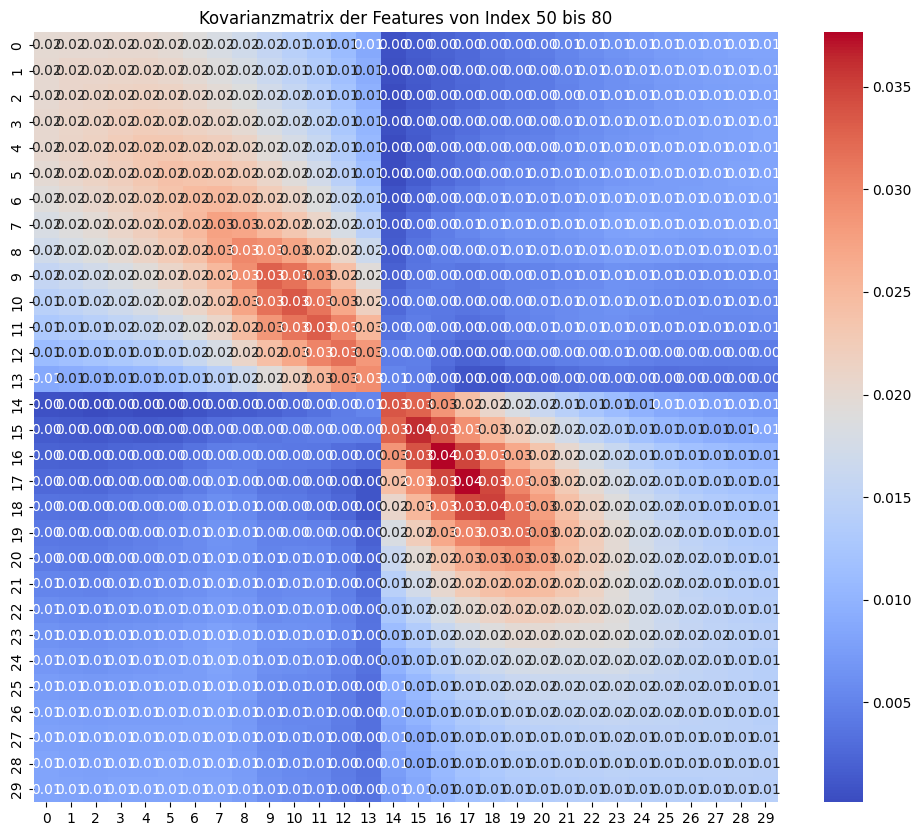

Die Features mit der größten Kovarianz zueinander im Bereich 50 bis 80 haben die Indizes: 66 und 67
Maximale Kovarianz in diesem Bereich: 0.03


In [17]:
# Definieren Sie den Bereich der Features, den Sie untersuchen möchten
start_index = 50
end_index = 80

# Berechnen der Kovarianzmatrix für die Features im Bereich 50 bis 80
cov_matrix_subset = np.cov(faces[:, start_index:end_index], rowvar=False)

# Plot der Kovarianzmatrix
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title(f'Kovarianzmatrix der Features von Index {start_index} bis {end_index}')
plt.show()

# Finden der Features mit der größten Kovarianz
max_cov_subset = np.max(np.abs(cov_matrix_subset[np.triu_indices_from(cov_matrix_subset, k=1)]))
max_cov_indices_subset = np.where(np.abs(cov_matrix_subset) == max_cov_subset)

print(f"Die Features mit der größten Kovarianz zueinander im Bereich {start_index} bis {end_index} haben die Indizes: {max_cov_indices_subset[0][0]+start_index} und {max_cov_indices_subset[1][0]+start_index}")
print(f"Maximale Kovarianz in diesem Bereich: {max_cov_subset:.2f}")

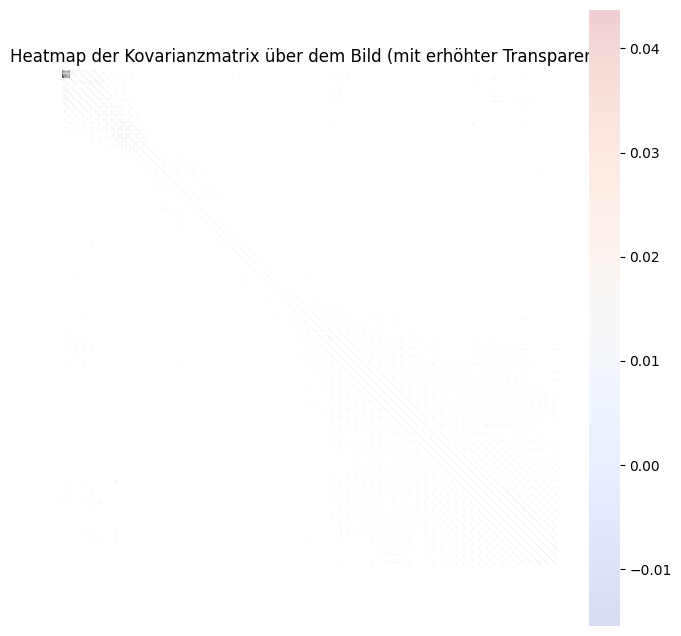

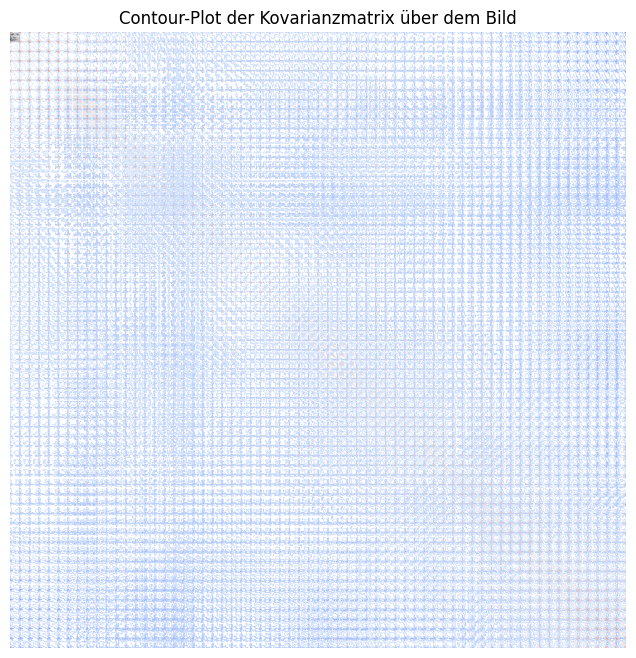

In [23]:
background_image = faces[0].reshape(64, 64)

cov_matrix = np.cov(faces, rowvar=False)

# Set a threshold to filter out low covariance values
threshold = 0.01
mask = np.abs(cov_matrix) < threshold

# Plotten des Bildes
plt.figure(figsize=(8, 8))
plt.imshow(background_image, cmap='gray')

# Plot the heatmap only for values above the threshold with reduced alpha
sns.heatmap(cov_matrix, mask=mask, cmap='coolwarm', alpha=0.2, cbar=True, square=True)

plt.title('Heatmap der Kovarianzmatrix über dem Bild (mit erhöhter Transparenz)')
plt.axis('off')
plt.show()

# Alternative: Using Matplotlib's contour plot to overlay
plt.figure(figsize=(8, 8))
plt.imshow(background_image, cmap='gray')

# Overlay contour for significant covariance regions
plt.contour(cov_matrix, levels=10, linewidths=0.5, cmap="coolwarm", alpha=0.6)

plt.title('Contour-Plot der Kovarianzmatrix über dem Bild')
plt.axis('off')
plt.show()

## Part II
Gesichtsklassifzierung

## Klassifikation durch nächstgelegenen Nachbarn

### <font style="color:rgb(50,120,229)">Schritte der Klassifikation:</font>

1. **Transformation in den PCA-Raum:**

   Jedes Testgesicht $ x_{\text{test}} $ wird in den PCA-Raum transformiert:
   
   $$
   x_{\text{test,PCA}} = x_{\text{test}} W
   $$
   
   wobei $ W $ die Matrix der Eigenvektoren ist.

2. **Berechnung der euklidischen Distanz:**

   Die euklidische Distanz zwischen dem transformierten Testgesicht $ x_{\text{test,PCA}} $ und jedem transformierten Trainingsgesicht $ x_{\text{train,PCA}} $ wird berechnet:
   
   $$
   d(x_{\text{test,PCA}}, x_{\text{train,PCA}}) = \| x_{\text{test,PCA}} - x_{\text{train,PCA}} \|_2
   $$
   
3. **Zuordnung des Labels:**

   Das Label des Testgesichts $ y_{\text{pred}} $ wird durch das Label des nächstgelegenen Trainingsgesichts zugeordnet:
   
   $$
   y_{\text{pred}} = \arg\min_{i} \| x_{\text{test,PCA}} - x_{\text{train,PCA}}^{(i)} \|_2
   $$
   
   wobei $ x_{\text{train,PCA}}^{(i)}$ das $i$-te Trainingsgesicht im PCA-Raum ist.


In [20]:
labels = dataset.target
n_samples, n_features = faces.shape

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(faces_pca, labels, test_size=0.2, random_state=42)


In [22]:
# Klassifikation im Hauptachsenraum
def classify_face(face_pca, X_train_pca, y_train):
    distances = np.linalg.norm(X_train_pca - face_pca, axis=1)
    return y_train[np.argmin(distances)]


In [23]:
# Vorhersagen für die Testdaten treffen
y_pred = [classify_face(face, X_train_pca, y_train) for face in X_test_pca]


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit der Gesichtserkennung: {accuracy:.2f}')


Genauigkeit der Gesichtserkennung: 0.82


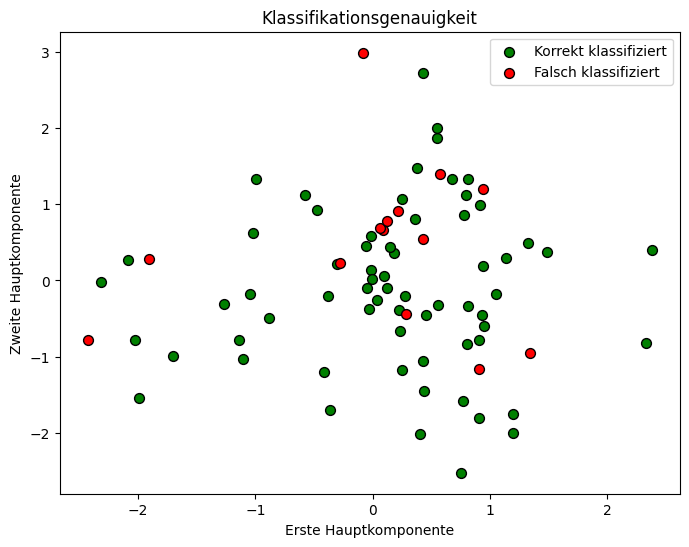

In [25]:
plt.figure(figsize=(8,6))

# Korrekt klassifizierte Punkte
correct = y_test == y_pred
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', label='Korrekt klassifiziert', edgecolor='k', s=50)

# Falsch klassifizierte Punkte
incorrect = ~correct
plt.scatter(X_test_pca[incorrect, 0], X_test_pca[incorrect, 1], c='red', label='Falsch klassifiziert', edgecolor='k', s=50)

plt.title("Klassifikationsgenauigkeit")
plt.xlabel("Erste Hauptkomponente")
plt.ylabel("Zweite Hauptkomponente")
plt.legend()
plt.show()

# Ausblick 
- Verbesserung der Genauigkeit z. B durch andere Klassifizierer wie KNN oder Data augmentaion mit 


## <font style="color:rgb(50,120,229)">Eigenfaces</font>

Eigenfaces Erweiterung also Bilder, die zu einem Durchschnittsgesicht hinzugefügt werden können, um neue Gesichter zu erzeugen. Mathematisch können wir dies wie folgt ausdrücken:

$$
F = F_{m} + \sum \limits _{i=1} ^{n} \alpha_{i}F_{i}
$$

wobei:

- $F$ ein neues Gesicht ist.
- $F_{m}$ das Mittel- oder Durchschnittsgesicht ist.
- $F_{i}$ ein Eigenface ist.
- $\alpha_{i}$ Skalare Multiplikatoren sind, die wir wählen können, um neue Gesichter zu erstellen. Sie können positiv oder negativ sein.

Eigenfaces werden berechnet, indem die Hauptkomponenten (Principal Components) des Datensatzes von Gesichtsbildern geschätzt werden. Sie werden in Anwendungen wie Gesichtserkennung und Erkennung von Gesichtspunkten verwendet.


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7], 'p': [1, 2]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_train_pca, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7], 'p': [1, 2]})

In [31]:
# Bestes Modell aus GridSearchCV abrufen
best_model = grid.best_estimator_

# Vorhersagen auf den Testdaten machen
y_pred = best_model.predict(X_test_pca)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)

print(f"Genauigkeit des besten Modells: {accuracy:.2f}")


Genauigkeit des besten Modells: 0.84


# Literatur und Quellen

- https://www.youtube.com/watch?v=SaEmG4wcFfg&t=901s&pp=ygUNcGNhIGVpZ2VuZmFjZQ%3D%3D
- https://databookuw.com/databook.pdf
- https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
- Folien_DMLA (Hülsmann)
- Folien Numerik (Hülsmann)
- A. Quarteroni, R. Sacco, F. Saleri: Numerische Mathematik 2
- https://de.wikipedia.org/wiki/Hauptkomponentenanalyse
- https://www.youtube.com/watch?v=ofWji_wQBEE&pp=ygUNcGNhIGVpZ2VuZmFjZQ%3D%3D
